In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('churn-bigml-80.csv')

In [89]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [90]:
#Drop non-predictive identifiers 
df_excluded = df.drop(['Account length'], axis=1)
df_excluded.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [91]:
#Convert the churn column into binary (0 = No, 1 = Yes).
df_excluded = df_excluded.replace({'Yes': 1, 'No': 0})
df_excluded.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_18448\3545146418.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_excluded = df_excluded.replace({'Yes': 1, 'No': 0})


,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [92]:
df_encoded = pd.get_dummies(df_excluded, columns=['State', 'Area code'])
df_encoded.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,True,False
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,True,False
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,True,False,False
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


2. Exploratory Data Analysis (5 pts)

Churn Rate: 14.55%


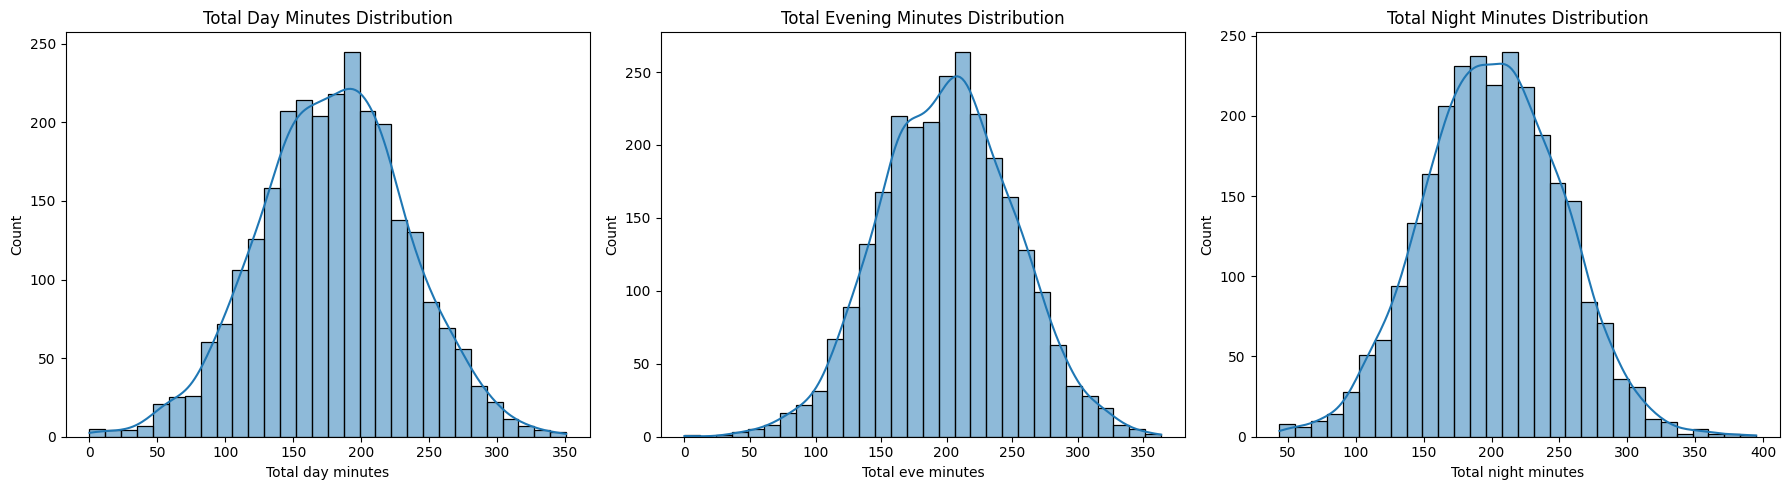

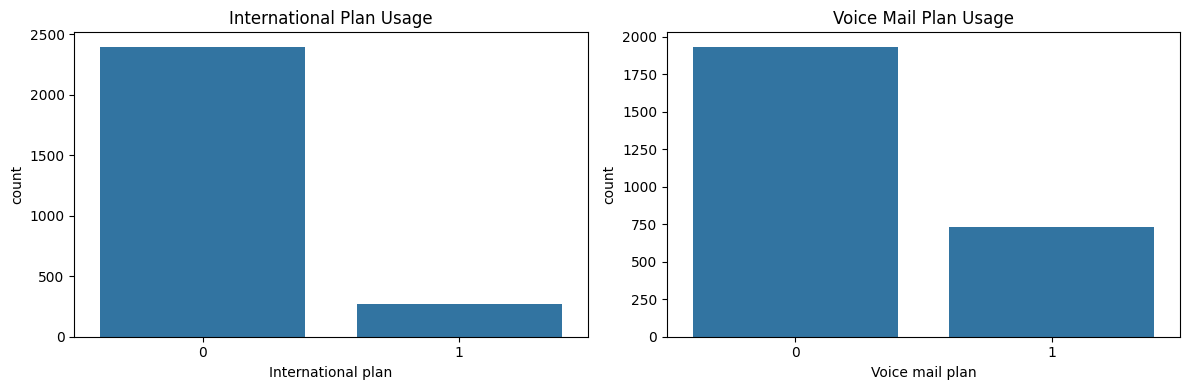

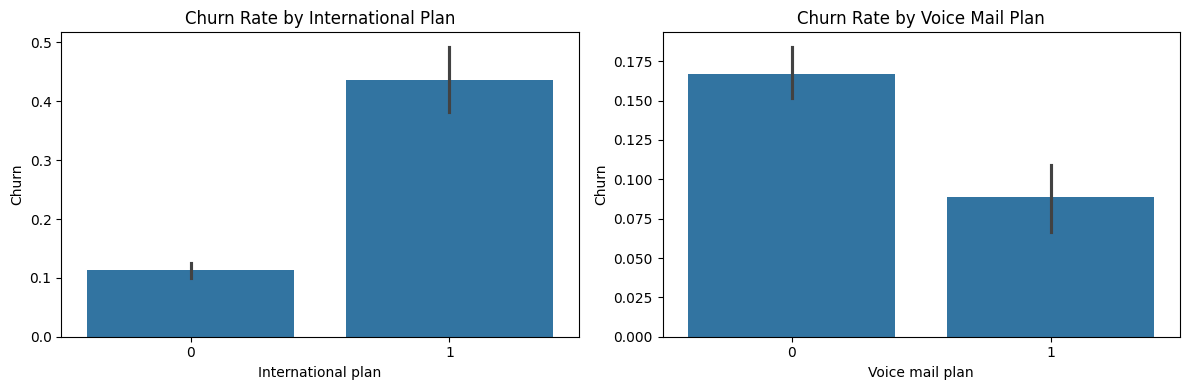

       Total day minutes  Total eve minutes  Total night minutes  \
count         2666.00000        2666.000000          2666.000000   
mean           179.48162         200.386159           201.168942   
std             54.21035          50.951515            50.780323   
min              0.00000           0.000000            43.700000   
25%            143.40000         165.300000           166.925000   
50%            179.95000         200.900000           201.150000   
75%            215.90000         235.100000           236.475000   
max            350.80000         363.700000           395.000000   

       Customer service calls  
count             2666.000000  
mean                 1.562641  
std                  1.311236  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  9.000000  


In [93]:
import seaborn as sns

import matplotlib.pyplot as plt

# Churn rate
churn_rate = df_excluded['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

# Distribution of call minutes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_excluded['Total day minutes'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Total Day Minutes Distribution')
sns.histplot(df_excluded['Total eve minutes'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Total Evening Minutes Distribution')
sns.histplot(df_excluded['Total night minutes'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Total Night Minutes Distribution')
plt.tight_layout()
plt.show()

# Service usage: International plan and Voice mail plan
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='International plan', data=df_excluded, ax=axes[0])
axes[0].set_title('International Plan Usage')
sns.countplot(x='Voice mail plan', data=df_excluded, ax=axes[1])
axes[1].set_title('Voice Mail Plan Usage')
plt.tight_layout()
plt.show()

# Churn by service usage
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x='International plan', y='Churn', data=df_excluded, ax=axes[0])
axes[0].set_title('Churn Rate by International Plan')
sns.barplot(x='Voice mail plan', y='Churn', data=df_excluded, ax=axes[1])
axes[1].set_title('Churn Rate by Voice Mail Plan')
plt.tight_layout()
plt.show()

# Summary statistics for key features
print(df_excluded[['Total day minutes', 'Total eve minutes', 'Total night minutes',
                   'Customer service calls', 'Churn']].describe())

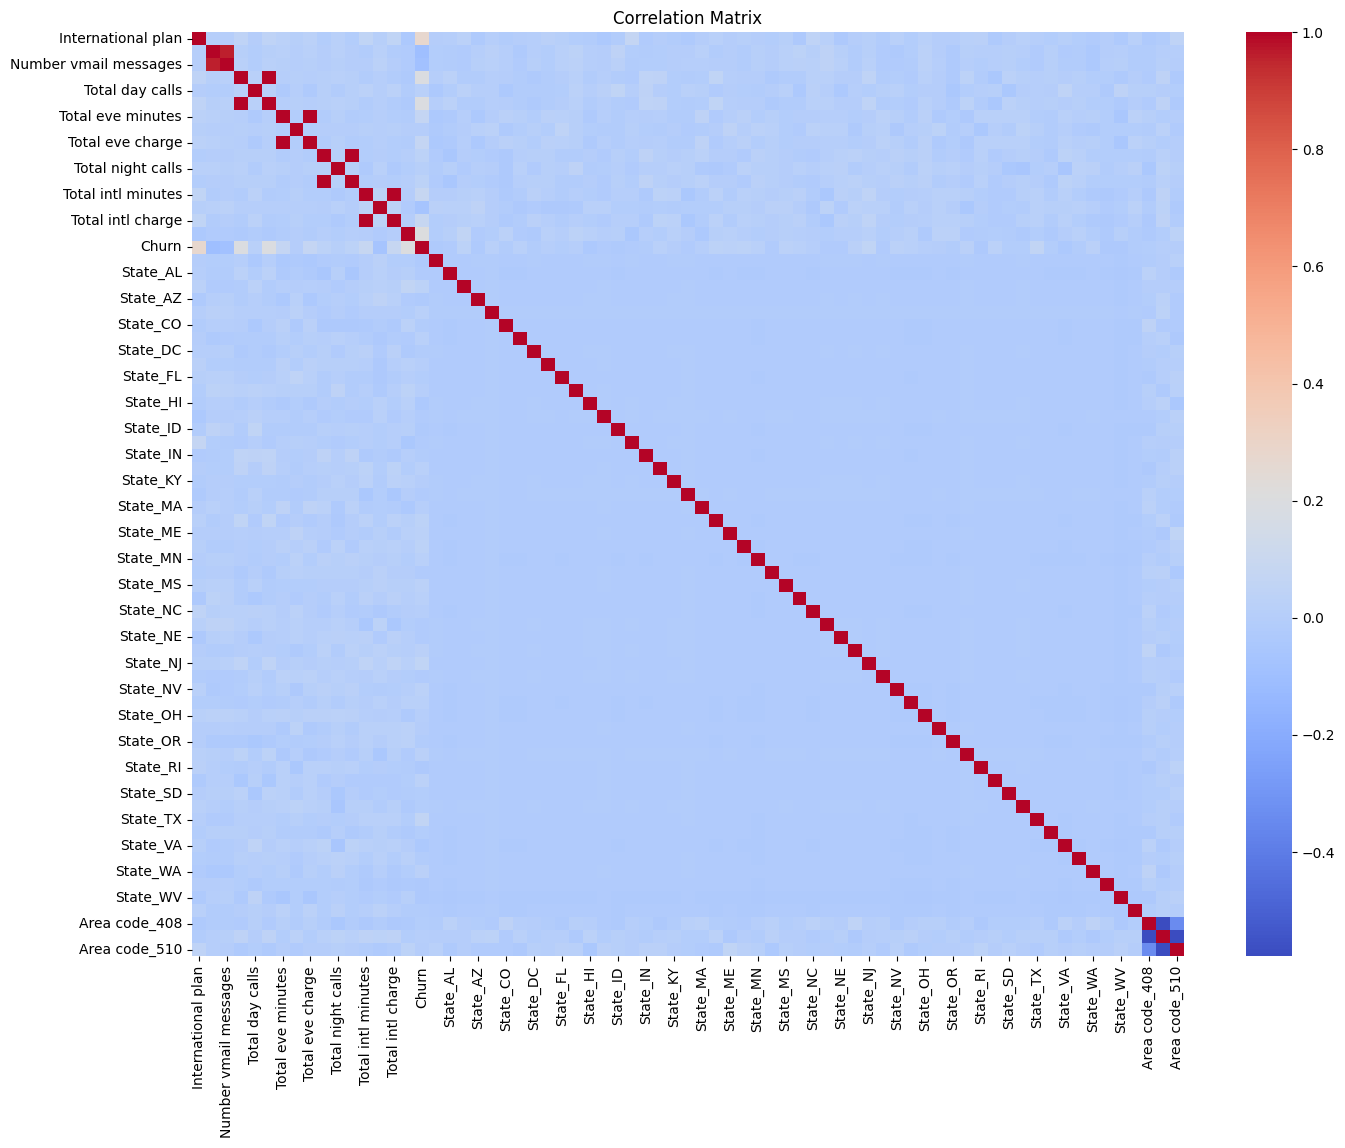

In [94]:
corr = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_18448\670800113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numFeatures = numFeatures.replace({'Yes': 1, 'No': 0})


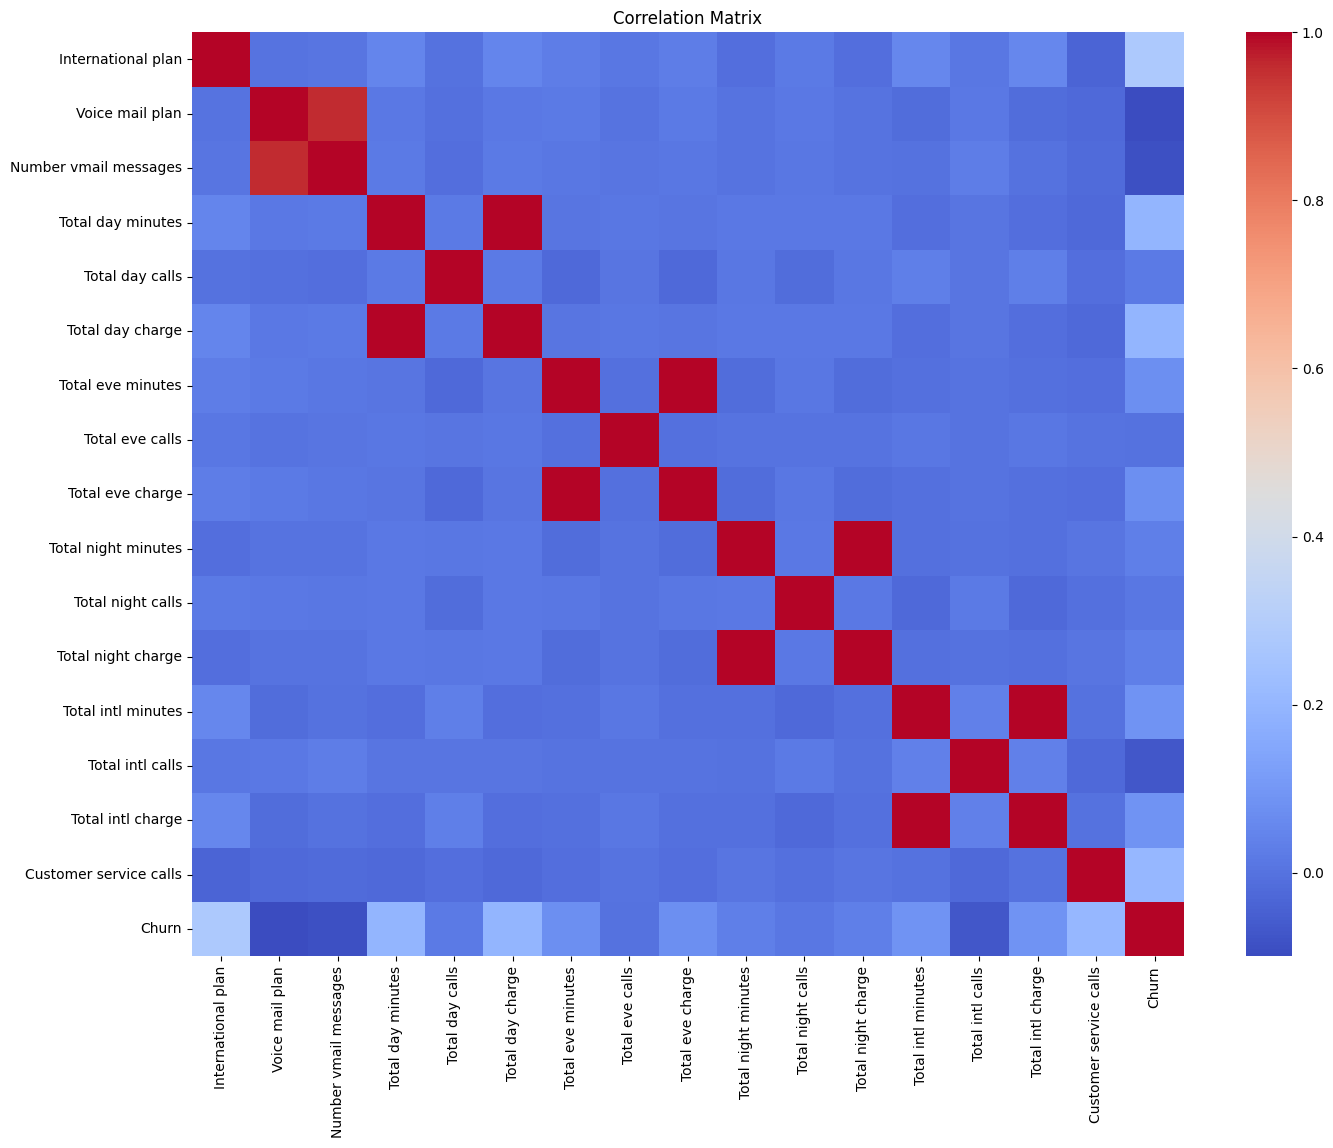

In [95]:
numFeatures = df.drop(['Account length', 'State', 'Area code'], axis=1)
numFeatures = numFeatures.replace({'Yes': 1, 'No': 0})
corre = numFeatures.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corre, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

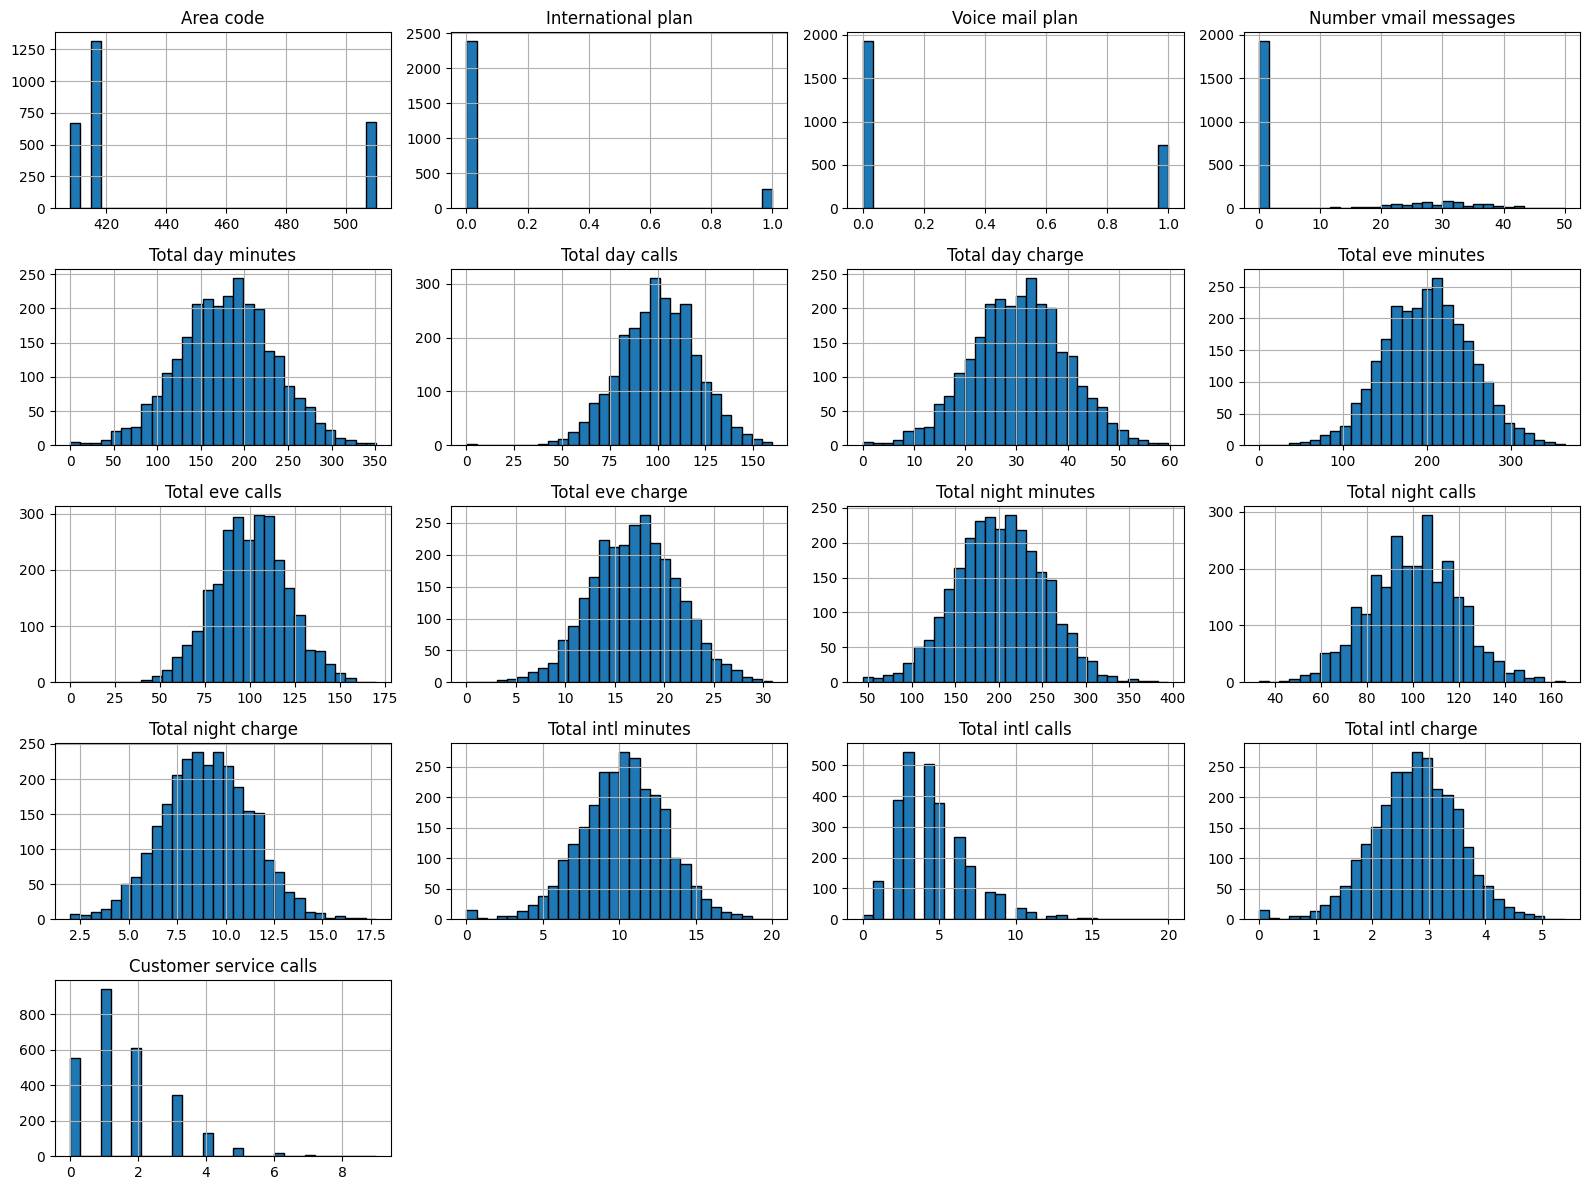

In [96]:
# Plot the distribution of numerical features in df_excluded
numeric_cols = df_excluded.select_dtypes(include=['int64', 'float64', 'bool']).columns

df_excluded[numeric_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

Most of the distribution are normal, however there are high imblance of international plans, voicemail plan

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].astype(int)  # Ensure target is integer

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[434  21]
 [ 61  18]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       455
           1       0.46      0.23      0.31        79

    accuracy                           0.85       534
   macro avg       0.67      0.59      0.61       534
weighted avg       0.82      0.85      0.82       534



c:\Users\Owner\Documents\GitHub\SA2_DM\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

# Prepare features and target
X_ridge = df_encoded.drop('Churn', axis=1)
y_ridge = df_encoded['Churn'].astype(int)

# Split data
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Ridge regression with grid search
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge(max_iter=10000)
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_ridge, y_train_ridge)

# Best estimator
ridge_best = ridge_grid.best_estimator_

# Predict and evaluate
y_pred_ridge = ridge_best.predict(X_test_ridge)
mse = mean_squared_error(y_test_ridge, y_pred_ridge)
r2 = r2_score(y_test_ridge, y_pred_ridge)

print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")
# Convert regression predictions to binary using 0.5 threshold
y_pred_ridge_class = (y_pred_ridge >= 0.5).astype(int)
print(classification_report(y_test_ridge, y_pred_ridge_class))

Best alpha: 10
Test MSE: 0.1088
Test R^2: 0.1366
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       455
           1       0.65      0.16      0.26        79

    accuracy                           0.86       534
   macro avg       0.76      0.57      0.59       534
weighted avg       0.84      0.86      0.83       534



In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Prepare features and target
X_lasso = df_encoded.drop('Churn', axis=1)
y_lasso = df_encoded['Churn'].astype(int)

# Split data
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

# Lasso regression with grid search
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_lasso, y_train_lasso)

# Best estimator
lasso_best = lasso_grid.best_estimator_

# Predict and evaluate
y_pred_lasso = lasso_best.predict(X_test_lasso)
y_pred_lasso_class = (y_pred_lasso >= 0.5).astype(int)
print(classification_report(y_test_lasso, y_pred_lasso_class))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       455
           1       1.00      0.09      0.16        79

    accuracy                           0.87       534
   macro avg       0.93      0.54      0.54       534
weighted avg       0.88      0.87      0.81       534



In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train a Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = dtree.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       455
           1       0.68      0.59      0.64        79

    accuracy                           0.90       534
   macro avg       0.81      0.77      0.79       534
weighted avg       0.89      0.90      0.90       534



In [101]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       455
           1       1.00      0.58      0.74        79

    accuracy                           0.94       534
   macro avg       0.97      0.79      0.85       534
weighted avg       0.94      0.94      0.93       534



In [102]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42, n_estimators=100)
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred_gbc = gbc.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       455
           1       0.92      0.72      0.81        79

    accuracy                           0.95       534
   macro avg       0.94      0.86      0.89       534
weighted avg       0.95      0.95      0.95       534



In [103]:
testingDF= pd.read_csv('churn-bigml-20.csv')
testingDF = testingDF.drop(['Account length'], axis=1)
testingDF = testingDF.replace({'Yes': 1, 'No': 0})
testingDF = pd.get_dummies(testingDF, columns=['State', 'Area code'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_18448\3432314905.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testingDF = testingDF.replace({'Yes': 1, 'No': 0})


In [104]:
from sklearn.metrics import classification_report

# Split features and labels for testingDF
X_test = testingDF.drop('Churn', axis=1)
y_test = testingDF['Churn']

# Logistic Regression
y_pred_test_logreg = logreg.predict(X_test)
print("Logistic Regression on testingDF")
print(classification_report(y_test, y_pred_test_logreg))

# Ridge Regression
y_pred_test_ridge = ridge_best.predict(X_test)
y_pred_test_ridge_class = (y_pred_test_ridge >= 0.5).astype(int)
print("Ridge Regression on testingDF")
print(classification_report(y_test, y_pred_test_ridge_class))

# Lasso Regression
y_pred_test_lasso = lasso_best.predict(X_test)
y_pred_test_lasso_class = (y_pred_test_lasso >= 0.5).astype(int)
print("Lasso Regression on testingDF")
print(classification_report(y_test, y_pred_test_lasso_class))

# Decision Tree
y_pred_test_tree = dtree.predict(X_test)
print("Decision Tree on testingDF")
print(classification_report(y_test, y_pred_test_tree))

# Random Forest
y_pred_test_rf = rf.predict(X_test)
print("Random Forest on testingDF")
print(classification_report(y_test, y_pred_test_rf))

# Gradient Boosting
y_pred_test_gbc = gbc.predict(X_test)
print("Gradient Boosting on testingDF")
print(classification_report(y_test, y_pred_test_gbc))


Logistic Regression on testingDF
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       572
        True       0.48      0.22      0.30        95

    accuracy                           0.85       667
   macro avg       0.68      0.59      0.61       667
weighted avg       0.82      0.85      0.83       667

Ridge Regression on testingDF
              precision    recall  f1-score   support

       False       0.86      0.98      0.92       572
        True       0.44      0.07      0.13        95

    accuracy                           0.85       667
   macro avg       0.65      0.53      0.52       667
weighted avg       0.80      0.85      0.81       667

Lasso Regression on testingDF
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       572
        True       1.00      0.02      0.04        95

    accuracy                           0.86       667
   macro avg       0.93      0.51  

### Best Performing Model
Based on F1-score and balanced performance across precision and recall, **Gradient Boosting** often yields the best performance. It balances overfitting and generalization by building trees sequentially.

### Bias-Variance Trade-off
- **Logistic, Ridge, Lasso**: High bias, low variance — simpler models but may underfit complex patterns.
- **Tree-based models**: Decision Trees have high variance and overfit easily, while Random Forest and Gradient Boosting reduce variance using ensemble strategies.

### Interpretability vs. Predictive Power
- **Regression models**: More interpretable, with coefficients directly linked to features.
- **Tree ensembles**: Less interpretable but usually more powerful in prediction due to capturing nonlinear relationships.

### Real-world Implications
A telecom company can use these models to:
- **Identify customers likely to churn** and proactively offer incentives.
- **Understand key drivers** of churn using feature importances (e.g., 'International plan', 'Total day minutes').
- **Segment customers** for targeted retention strategies, reducing revenue loss and improving satisfaction.

Ultimately, the model selection depends on whether the priority is **accuracy** (Gradient Boosting) or **interpretability** (Logistic Regression or Lasso).